In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Load the dataset
file_path = r'C:\Users\samba\spam(spam).csv'
data = pd.read_csv(file_path, encoding='latin-1')
print (data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


# Data Preprocessing

In [27]:
# Keep only relevant columns
data = data[['v1', 'v2']]

# Display the first few rows to verify
print(data.head())

     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [31]:
# Rename columns for clarity
data.columns = ['label', 'message']

# Display the first few rows to verify column names
print(data.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [33]:
# Check for duplicates before removal
print(f"Number of duplicates before removal: {data.duplicated().sum()}")

# Remove duplicates
data.drop_duplicates(inplace=True)

# Verify if duplicates were removed
print(f"Number of duplicates after removal: {data.duplicated().sum()}")
print(data.head())

Number of duplicates before removal: 403
Number of duplicates after removal: 0
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [35]:
# Encode labels
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

# Verify encoding
print(data[['label', 'label_num']].head())

# Display the class distribution to ensure labels are correctly mapped
print(data['label_num'].value_counts())

  label  label_num
0   ham          0
1   ham          0
2  spam          1
3   ham          0
4   ham          0
label_num
0    4516
1     653
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

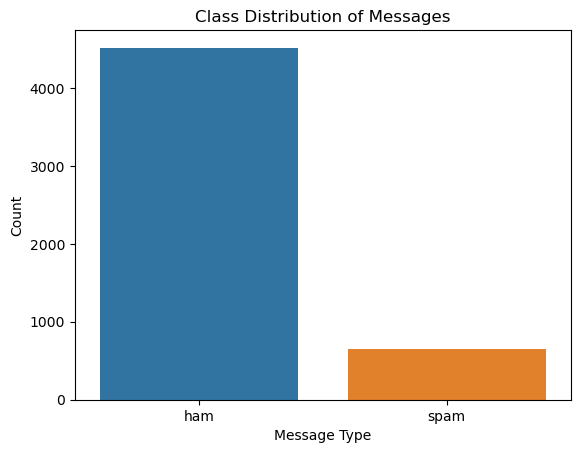

In [37]:
# Class Distribution Visualization
sns.countplot(x='label', data=data)
plt.title('Class Distribution of Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.savefig('class_distribution.png')  # Save the plot
plt.show()

C:\Users\samba\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


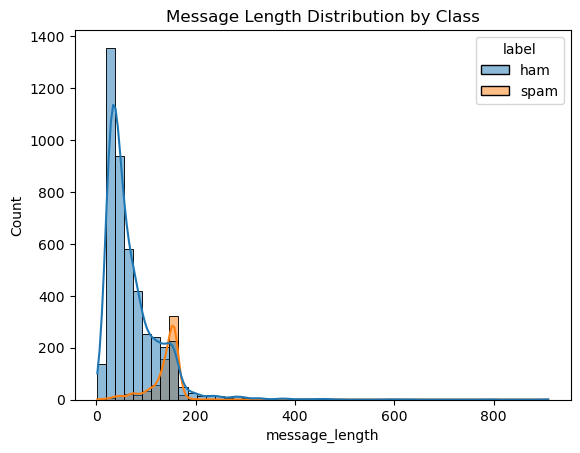

In [39]:
# Message Length Distribution Visualization
data['message_length'] = data['message'].apply(len)
sns.histplot(data=data, x='message_length', hue='label', bins=50, kde=True)
plt.title('Message Length Distribution by Class')
plt.savefig('message_length_distribution.png')  # Save the plot
plt.show()

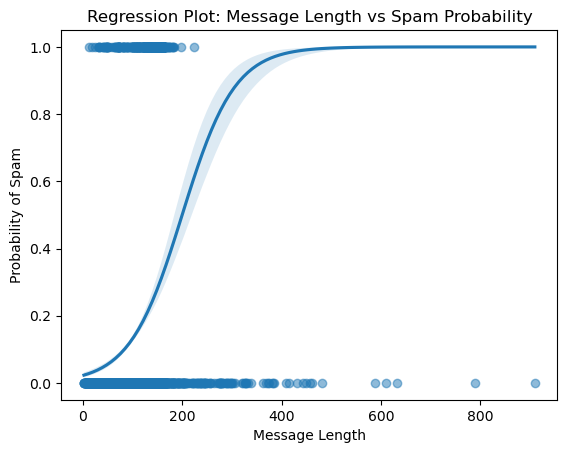

In [55]:
# Plot regression of message length vs spam probability
sns.regplot(x='message_length', y='label_num', data=data, logistic=True, scatter_kws={'alpha':0.5})
plt.title('Regression Plot: Message Length vs Spam Probability')
plt.xlabel('Message Length')
plt.ylabel('Probability of Spam')
plt.savefig('regression_message_length_spam.png')  # Save the regression plot
plt.show()

In [57]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label_num'], test_size=0.2, random_state=42)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert text data into numerical format
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [65]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_vec, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test_vec)

In [67]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train_vec, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_vec)

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate models and visualize confusion matrix
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Performance Metrics:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    
    conf_mat = confusion_matrix(y_true, y_pred)
    print(f"Confusion Matrix:\n{conf_mat}")
    print(f"Classification Report:\n{classification_report(y_true, y_pred)}")
    
    # Heatmap for confusion matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig(f"{model_name.lower().replace(' ', '_')}_confusion_matrix.png")  # Save heatmap
    plt.show()


Logistic Regression Performance Metrics:
Accuracy: 0.9787
Precision: 0.9695
Recall: 0.8759
Confusion Matrix:
[[885   4]
 [ 18 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.97      0.88      0.92       145

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034



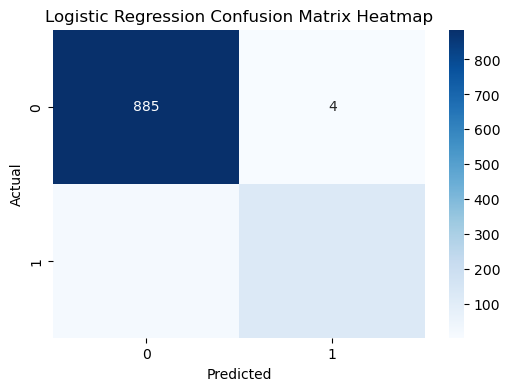


Support Vector Machine Performance Metrics:
Accuracy: 0.9816
Precision: 0.9922
Recall: 0.8759
Confusion Matrix:
[[888   1]
 [ 18 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.88      0.93       145

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



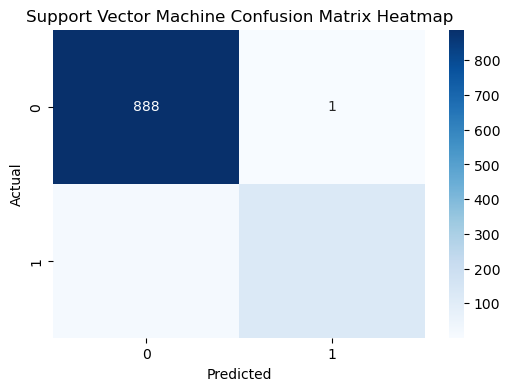

In [59]:
# Evaluate Logistic Regression
evaluate_model(y_test, y_pred_log, 'Logistic Regression')

# Evaluate SVM
evaluate_model(y_test, y_pred_svm, 'Support Vector Machine')

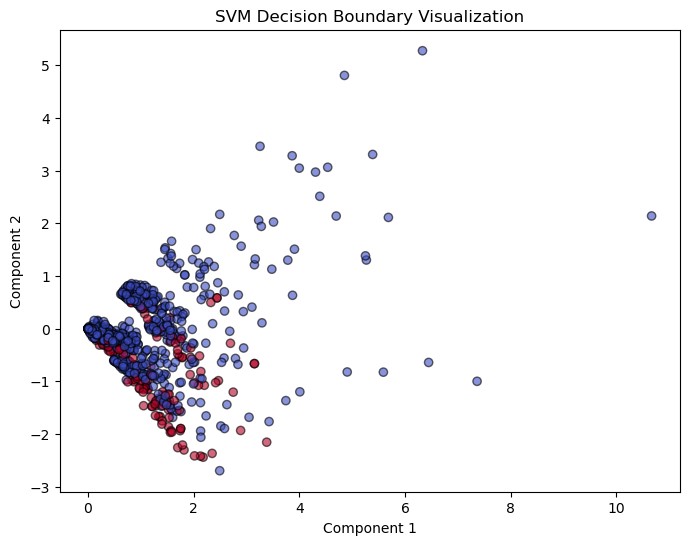

In [71]:
from sklearn.decomposition import TruncatedSVD

# Reduce dimensions for visualization
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X_test_vec)

# Plotting decision boundary
plt.figure(figsize=(8,6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_svm, cmap='coolwarm', alpha=0.6, edgecolors='k')
plt.title('SVM Decision Boundary Visualization')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('svm_decision_boundary.png')  # Save scatter plot
plt.show()

# Analysis Section

In [73]:

print("\nAnalysis:")
if accuracy_score(y_test, y_pred_log) > accuracy_score(y_test, y_pred_svm):
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Support Vector Machine performed better based on accuracy.")

print("\nTo improve model accuracy, consider:")
print("1. Hyperparameter tuning using GridSearchCV.")
print("2. Using other vectorization techniques or feature engineering.")
print("3. Exploring additional algorithms like Naive Bayes or ensemble methods.")

print("\nAdditional Evaluation Techniques:")
print("1. Plotting ROC-AUC curves.")
print("2. Using cross-validation to verify model stability.")



Analysis:
Support Vector Machine performed better based on accuracy.

To improve model accuracy, consider:
1. Hyperparameter tuning using GridSearchCV.
2. Using other vectorization techniques or feature engineering.
3. Exploring additional algorithms like Naive Bayes or ensemble methods.

Additional Evaluation Techniques:
1. Plotting ROC-AUC curves.
2. Using cross-validation to verify model stability.
